In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#pip install imblearn

In [3]:
data = pd.read_csv('pokemon.csv')

In [4]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
data.shape

(800, 13)

In [6]:
datamf = data.drop(labels = ["#","Type 2","Name","Total"],axis = 1)

In [7]:
datamf

,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,45,49,49,65,65,45,1,False
1,Grass,60,62,63,80,80,60,1,False
2,Grass,80,82,83,100,100,80,1,False
3,Grass,80,100,123,122,120,80,1,False
4,Fire,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...
795,Rock,50,100,150,100,150,50,6,True
796,Rock,50,160,110,160,110,110,6,True
797,Psychic,80,110,60,150,130,70,6,True
798,Psychic,80,160,60,170,130,80,6,True


In [8]:
prior = datamf.groupby('Legendary').size()
prior

Legendary
False    735
True      65
dtype: int64

In [9]:
import seaborn as sns

<AxesSubplot:xlabel='Legendary', ylabel='count'>

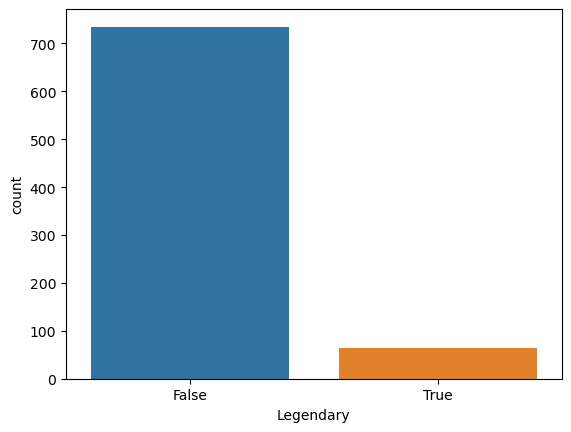

In [10]:
sns.countplot(x=datamf["Legendary"])

In [11]:
legnByGeneration = data.groupby(['Legendary','Generation']).size()
print(legnByGeneration)

Legendary  Generation
False      1             160
           2             101
           3             142
           4             108
           5             150
           6              74
True       1               6
           2               5
           3              18
           4              13
           5              15
           6               8
dtype: int64


In [12]:
dff= datamf.drop(labels = ["Type 1","HP","Attack","Defense","Sp. Atk","Sp. Def","Speed"],axis = 1)
pivot = pd.pivot_table(dff,columns = ['Generation'])
pivot


Generation,1,2,3,4,5,6
Legendary,0.036145,0.04717,0.1125,0.107438,0.090909,0.097561


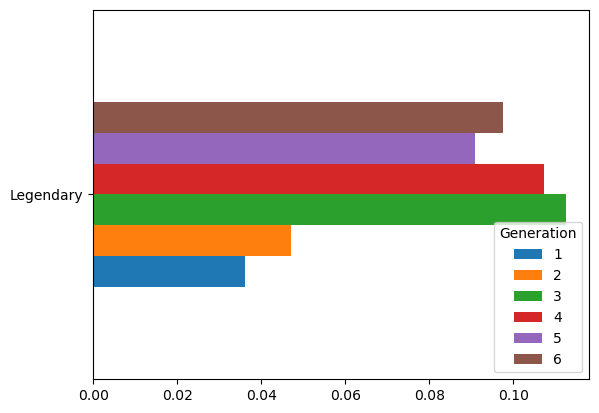

In [13]:
ax = pivot.plot.barh()

In [14]:
datamf['gen_cat'] = pd.cut(x=datamf['Generation'], bins=[0,3,7],labels=['1 to 3', '4 to 6'])
datamf.tail()

,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,gen_cat
795,Rock,50,100,150,100,150,50,6,True,4 to 6
796,Rock,50,160,110,160,110,110,6,True,4 to 6
797,Psychic,80,110,60,150,130,70,6,True,4 to 6
798,Psychic,80,160,60,170,130,80,6,True,4 to 6
799,Fire,80,110,120,130,90,70,6,True,4 to 6


In [15]:
max_value = datamf['Attack'].max()
min_value = datamf['Attack'].min()

print("Max Value:", max_value)
print("Min Value:", min_value)

Max Value: 190
Min Value: 5


In [16]:
datamf['attack_cat'] = pd.cut(x=datamf['Attack'], bins=[4,50,100,150,191],labels=['5 to 50', '51 to 100','101 to 150','191 to 190'])
datamf

,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,gen_cat,attack_cat
0,Grass,45,49,49,65,65,45,1,False,1 to 3,5 to 50
1,Grass,60,62,63,80,80,60,1,False,1 to 3,51 to 100
2,Grass,80,82,83,100,100,80,1,False,1 to 3,51 to 100
3,Grass,80,100,123,122,120,80,1,False,1 to 3,51 to 100
4,Fire,39,52,43,60,50,65,1,False,1 to 3,51 to 100
...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,50,100,150,100,150,50,6,True,4 to 6,51 to 100
796,Rock,50,160,110,160,110,110,6,True,4 to 6,191 to 190
797,Psychic,80,110,60,150,130,70,6,True,4 to 6,101 to 150
798,Psychic,80,160,60,170,130,80,6,True,4 to 6,191 to 190


In [17]:
# Creates a pivot table dataframe
dff= datamf.drop(labels = ["Type 1","HP","Defense","Sp. Atk","Sp. Def","Speed","Generation",'Attack'],axis = 1)
pivot = pd.pivot_table(dff,index=['gen_cat'],columns = ['attack_cat'])
pivot

Legendary                                
attack_cat   5 to 50 51 to 100 101 to 150 191 to 190
gen_cat                                             
1 to 3      0.009259  0.062241     0.1250   0.363636
4 to 6      0.000000  0.050228     0.2625   0.571429

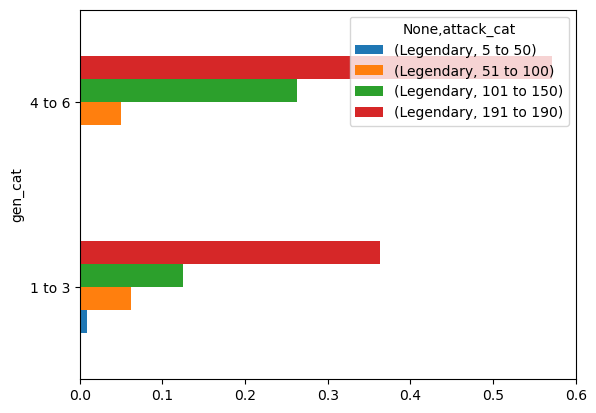

In [18]:
ax = pivot.plot.barh()

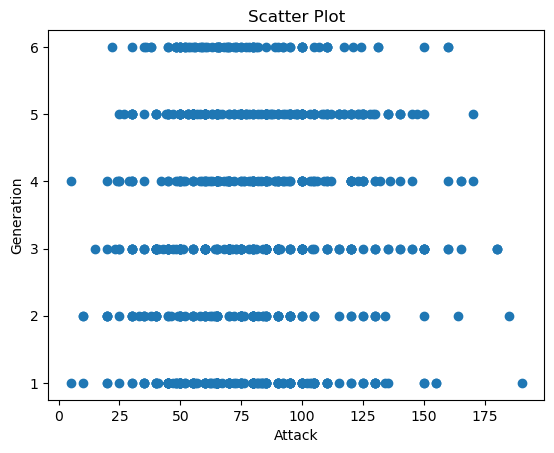

In [19]:
X=datamf['Attack']
Y=datamf['Generation']
# Extract the x and y coordinates from the matrix
import matplotlib.pyplot as plt
# Create a scatter plot
plt.scatter(X, Y)

# Add labels and title to the plot
plt.xlabel('Attack')
plt.ylabel('Generation')
plt.title('Scatter Plot')


# Show the plot
plt.show()

In [20]:


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical column
datamf['En_Legendary'] = label_encoder.fit_transform(datamf['Legendary'])
datamf['En_Type 1'] = label_encoder.fit_transform(datamf['Type 1'])

In [21]:
datamf = datamf.drop(labels = ["Legendary","Type 1","gen_cat","attack_cat"],axis = 1)

In [22]:
datamf

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,En_Legendary,En_Type 1
0,45,49,49,65,65,45,1,0,9
1,60,62,63,80,80,60,1,0,9
2,80,82,83,100,100,80,1,0,9
3,80,100,123,122,120,80,1,0,9
4,39,52,43,60,50,65,1,0,6
...,...,...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,6,1,15
796,50,160,110,160,110,110,6,1,15
797,80,110,60,150,130,70,6,1,14
798,80,160,60,170,130,80,6,1,14


<AxesSubplot:>

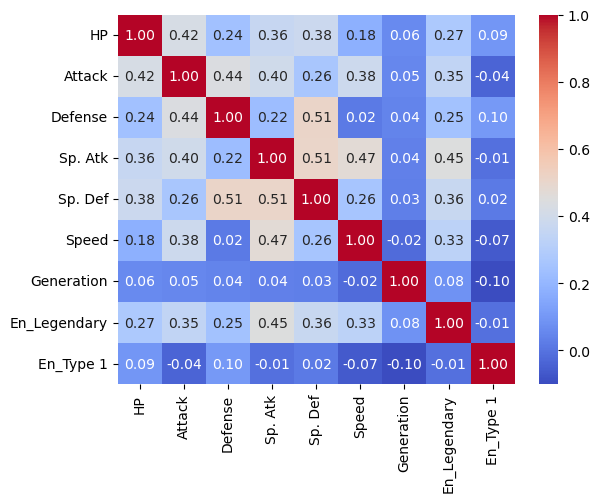

In [23]:
cor = datamf.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f')

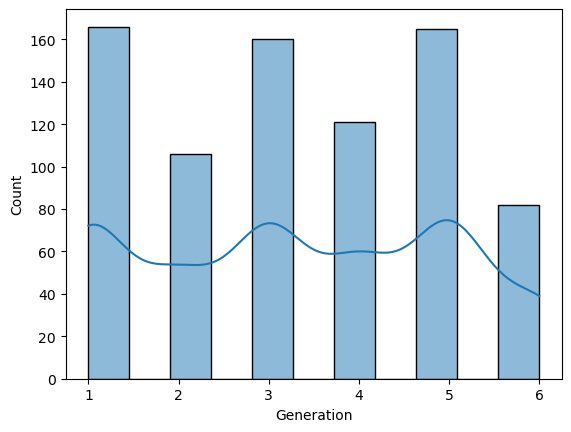

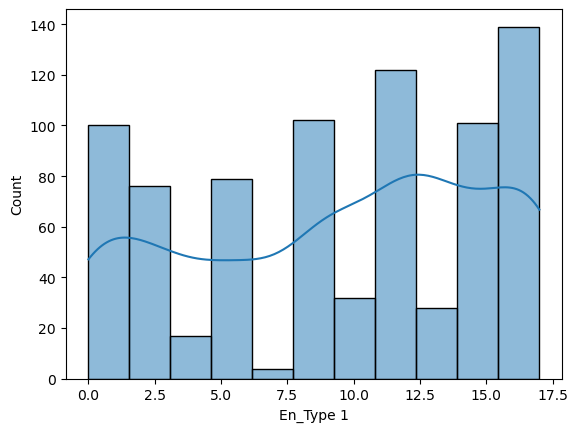

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.histplot(data=datamf,kde=True, x='HP')
#plt.show()
#sns.histplot(data=datamf,kde=True, x='Attack')
#plt.show()
#sns.histplot(data=datamf,kde=True, x='Defense')
#plt.show()
#sns.histplot(data=datamf,kde=True, x='Sp. Atk')
#plt.show()
#sns.histplot(data=datamf,kde=True, x='Sp. Def')
#plt.show()
#sns.histplot(data=datamf,kde=True, x='Speed')
#plt.show()
sns.histplot(data=datamf,kde=True, x='Generation')
plt.show()
sns.histplot(data=datamf,kde=True, x='En_Type 1')
plt.show()


In [25]:
datamf

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,En_Legendary,En_Type 1
0,45,49,49,65,65,45,1,0,9
1,60,62,63,80,80,60,1,0,9
2,80,82,83,100,100,80,1,0,9
3,80,100,123,122,120,80,1,0,9
4,39,52,43,60,50,65,1,0,6
...,...,...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,6,1,15
796,50,160,110,160,110,110,6,1,15
797,80,110,60,150,130,70,6,1,14
798,80,160,60,170,130,80,6,1,14


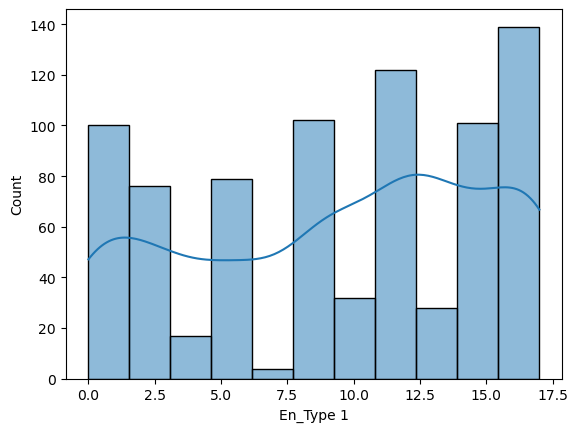

In [26]:
#X = X_shuffled[[ 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'En_Type 1']]


sns.histplot(data=datamf,kde=True, x='En_Type 1')
plt.show()

In [27]:
datamf

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,En_Legendary,En_Type 1
0,45,49,49,65,65,45,1,0,9
1,60,62,63,80,80,60,1,0,9
2,80,82,83,100,100,80,1,0,9
3,80,100,123,122,120,80,1,0,9
4,39,52,43,60,50,65,1,0,6
...,...,...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,6,1,15
796,50,160,110,160,110,110,6,1,15
797,80,110,60,150,130,70,6,1,14
798,80,160,60,170,130,80,6,1,14


In [28]:
X = datamf.drop(labels = ["En_Legendary"],axis = 1)
Y = datamf["En_Legendary"]
X_shuffled, y_shuffled = shuffle(X, Y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size = 0.3, random_state = 0,stratify=y_shuffled)



In [29]:
X_shuffled.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,En_Type 1
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,9.467500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,5.580356
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,5.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,10.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,14.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,17.000000


In [30]:
print("Class distribution in y_train:", np.bincount(y_train))
print("Class distribution in y_test:", np.bincount(y_test))

Class distribution in y_train: [514  46]
Class distribution in y_test: [221  19]


In [31]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [32]:
y_pred = nb.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [33]:
print("Naive Bayes score: ",nb.score(X_test, y_test))

Naive Bayes score:  0.9291666666666667


[[210  11]
 [  6  13]]


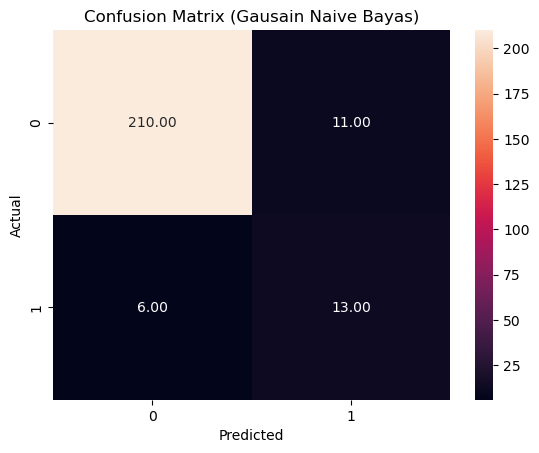

In [34]:
conf = confusion_matrix(y_test, y_pred)
print(conf)

sns.heatmap(conf, annot=True,fmt = ".2f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Gausain Naive Bayas)')
plt.show()

In [35]:

print('Classification Report (Gausain Naive Bayas)')
report = classification_report(y_test, y_pred,digits=4)
print(report)

Classification Report (Gausain Naive Bayas)
              precision    recall  f1-score   support

           0     0.9722    0.9502    0.9611       221
           1     0.5417    0.6842    0.6047        19

    accuracy                         0.9292       240
   macro avg     0.7569    0.8172    0.7829       240
weighted avg     0.9381    0.9292    0.9329       240



In [36]:
datamf

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,En_Legendary,En_Type 1
0,45,49,49,65,65,45,1,0,9
1,60,62,63,80,80,60,1,0,9
2,80,82,83,100,100,80,1,0,9
3,80,100,123,122,120,80,1,0,9
4,39,52,43,60,50,65,1,0,6
...,...,...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,6,1,15
796,50,160,110,160,110,110,6,1,15
797,80,110,60,150,130,70,6,1,14
798,80,160,60,170,130,80,6,1,14


In [37]:
type1_counts = datamf['Generation'].value_counts()

print(type1_counts)

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64


In [38]:
X_shuffled

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,En_Type 1
696,92,105,90,125,90,98,5,1
667,75,75,75,125,95,40,5,14
63,55,70,45,70,50,60,1,6
533,50,65,107,105,107,86,4,3
66,65,65,65,50,50,90,1,17
...,...,...,...,...,...,...,...,...
71,55,50,65,175,95,150,1,14
106,30,105,90,25,25,50,1,17
270,106,130,90,110,154,90,2,6
435,44,58,44,58,44,61,4,6


In [39]:
#Equal width Binning

# Define continuous features to discretize
continuous_features = [ 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X_shuffled2=X_shuffled.copy()
# Number of desired bins
num_bins = 10

# Apply equal width binning to each continuous feature
for feature in continuous_features:
    bin_width = (X_shuffled2[feature].max() - X_shuffled2[feature].min()) / num_bins
    bins = np.arange(X_shuffled2[feature].min(), X_shuffled2[feature].max() + bin_width, bin_width)
    X_shuffled2[feature + '_bins'] = pd.cut(X_shuffled2[feature], bins=bins, labels=False)

# Drop the original continuous features from the dataset
X_shuffled2.drop(continuous_features, axis=1, inplace=True)

print(X_shuffled2)


     Generation  En_Type 1  HP_bins  Attack_bins  Defense_bins  Sp. Atk_bins  \
696           5          1      3.0          5.0           3.0           6.0   
667           5         14      2.0          3.0           3.0           6.0   
63            1          6      2.0          3.0           1.0           3.0   
533           4          3      1.0          3.0           4.0           5.0   
66            1         17      2.0          3.0           2.0           2.0   
..          ...        ...      ...          ...           ...           ...   
71            1         14      2.0          2.0           2.0           8.0   
106           1         17      1.0          5.0           3.0           0.0   
270           2          6      4.0          6.0           3.0           5.0   
435           4          6      1.0          2.0           1.0           2.0   
102           1          8      2.0          3.0           3.0           8.0   

     Sp. Def_bins  Speed_bins  
696    

In [40]:
X_shuffled2.describe()

,Generation,En_Type 1,HP_bins,Attack_bins,Defense_bins,Sp. Atk_bins,Sp. Def_bins,Speed_bins
count,800.00000,800.000000,799.000000,798.000000,798.000000,797.000000,794.000000,798.000000
mean,3.32375,9.467500,2.158949,3.520050,2.505013,2.882058,1.977330,3.091479
std,1.66129,5.580356,1.041022,1.768673,1.405081,1.788051,1.365025,1.673591
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,5.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000
50%,3.00000,10.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000
75%,5.00000,14.000000,3.000000,5.000000,3.000000,4.000000,3.000000,4.000000
max,6.00000,17.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [41]:

# Loop through each column to fill NaN values with the mode
for column in X_shuffled2.columns:
    mode_value = X_shuffled2[column].mode()[0]
    X_shuffled2[column].fillna(mode_value, inplace=True)

print('Result:')
print(X_shuffled2)

Result:
     Generation  En_Type 1  HP_bins  Attack_bins  Defense_bins  Sp. Atk_bins  \
696           5          1      3.0          5.0           3.0           6.0   
667           5         14      2.0          3.0           3.0           6.0   
63            1          6      2.0          3.0           1.0           3.0   
533           4          3      1.0          3.0           4.0           5.0   
66            1         17      2.0          3.0           2.0           2.0   
..          ...        ...      ...          ...           ...           ...   
71            1         14      2.0          2.0           2.0           8.0   
106           1         17      1.0          5.0           3.0           0.0   
270           2          6      4.0          6.0           3.0           5.0   
435           4          6      1.0          2.0           1.0           2.0   
102           1          8      2.0          3.0           3.0           8.0   

     Sp. Def_bins  Speed_bins  

In [42]:
X_shuffled2.describe()

,Generation,En_Type 1,HP_bins,Attack_bins,Defense_bins,Sp. Atk_bins,Sp. Def_bins,Speed_bins
count,800.00000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000
mean,3.32375,9.467500,2.158750,3.51625,2.503750,2.878750,1.970000,3.091250
std,1.66129,5.580356,1.040385,1.76809,1.403548,1.785507,1.362505,1.671501
min,1.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,5.000000,1.000000,2.00000,1.000000,2.000000,1.000000,2.000000
50%,3.00000,10.000000,2.000000,3.00000,2.000000,2.000000,2.000000,3.000000
75%,5.00000,14.000000,3.000000,5.00000,3.000000,4.000000,3.000000,4.000000
max,6.00000,17.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000


In [43]:
X_shuffled

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,En_Type 1
696,92,105,90,125,90,98,5,1
667,75,75,75,125,95,40,5,14
63,55,70,45,70,50,60,1,6
533,50,65,107,105,107,86,4,3
66,65,65,65,50,50,90,1,17
...,...,...,...,...,...,...,...,...
71,55,50,65,175,95,150,1,14
106,30,105,90,25,25,50,1,17
270,106,130,90,110,154,90,2,6
435,44,58,44,58,44,61,4,6


In [44]:
y_shuffled.describe()

count    800.00000
mean       0.08125
std        0.27339
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max        1.00000
Name: En_Legendary, dtype: float64

In [45]:

X_train, X_test, y_train, y_test = train_test_split(X_shuffled2, y_shuffled, test_size = 0.3, random_state = 42,stratify=y_shuffled)

cat_nb = CategoricalNB()
cat_nb.fit(X_train, y_train)



CategoricalNB()

In [46]:
y_pred2 = cat_nb.predict(X_test)


[[211  10]
 [  3  16]]


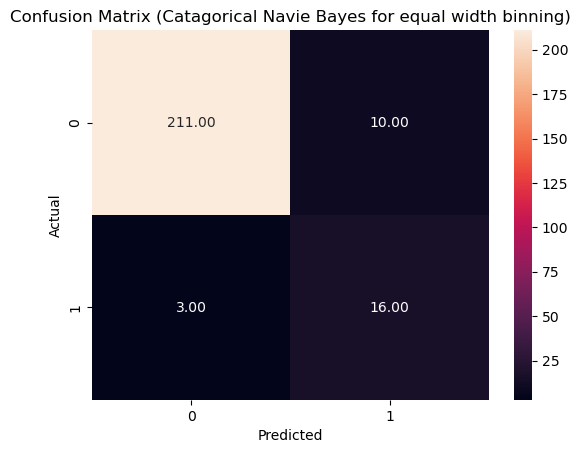

In [47]:
conf = confusion_matrix(y_test, y_pred2)
print(conf)

sns.heatmap(conf, annot=True,fmt = ".2f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Catagorical Navie Bayes for equal width binning)')
plt.show()


In [48]:
print("Naive Bayes score: ",cat_nb.score(X_test, y_test))

Naive Bayes score:  0.9458333333333333


In [49]:


report = classification_report(y_test, y_pred2, digits=4)
print('Classification Report (Catagorical Navie Bayes for equal width binning)')
print(report)

Classification Report (Catagorical Navie Bayes for equal width binning)
              precision    recall  f1-score   support

           0     0.9860    0.9548    0.9701       221
           1     0.6154    0.8421    0.7111        19

    accuracy                         0.9458       240
   macro avg     0.8007    0.8984    0.8406       240
weighted avg     0.9566    0.9458    0.9496       240



In [50]:
#Equal Frequency Binning

In [51]:
X_shuffled

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,En_Type 1
696,92,105,90,125,90,98,5,1
667,75,75,75,125,95,40,5,14
63,55,70,45,70,50,60,1,6
533,50,65,107,105,107,86,4,3
66,65,65,65,50,50,90,1,17
...,...,...,...,...,...,...,...,...
71,55,50,65,175,95,150,1,14
106,30,105,90,25,25,50,1,17
270,106,130,90,110,154,90,2,6
435,44,58,44,58,44,61,4,6


In [52]:
X_shuffled3=X_shuffled.copy()
# Define continuous features to discretize
continuous_features = [ 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Number of desired bins
num_bins = 10

# Create a new DataFrame to store the binned features
data_binned = X_shuffled3.copy()

# Apply equal frequency binning to each continuous feature
for feature in continuous_features:
    # Calculate the bin edges based on quantiles
    bins = pd.qcut(X_shuffled3[feature], q=num_bins, labels=False, duplicates='drop')
    
    # Replace the continuous feature with the binned feature
    data_binned[feature] = bins

print(data_binned)

     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  En_Type 1
696   8       7        7        9        7      8           5          1
667   6       4        5        9        7      1           5         14
63    2       4        1        5        2      4           1          6
533   1       3        8        8        8      7           4          3
66    4       3        4        2        2      7           1         17
..   ..     ...      ...      ...      ...    ...         ...        ...
71    2       1        4        9        7      9           1         14
106   0       7        7        0        0      2           1         17
270   9       9        7        8        9      7           2          6
435   1       2        1        3        1      4           4          6
102   3       3        6        9        7      9           1          8

[800 rows x 8 columns]


In [53]:
X_shuffled3=data_binned.copy()

In [54]:

X_train, X_test, y_train, y_test = train_test_split(X_shuffled3, y_shuffled, test_size = 0.3, random_state = 42,stratify=y_shuffled)

freq_cat_nb = CategoricalNB()
freq_cat_nb.fit(X_train, y_train)



CategoricalNB()

In [55]:
y_pred3 = freq_cat_nb.predict(X_test)


In [56]:
print("Naive Bayes score: ",freq_cat_nb.score(X_test, y_test))

Naive Bayes score:  0.9375


[[209  12]
 [  3  16]]


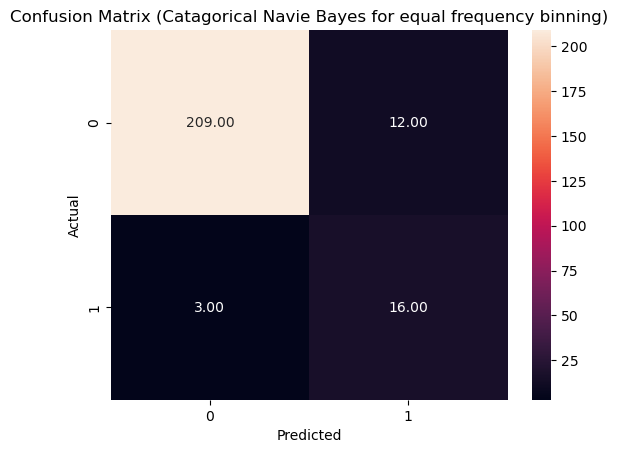

In [57]:
conf = confusion_matrix(y_test, y_pred3)
print(conf)

sns.heatmap(conf, annot=True,fmt = ".2f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Catagorical Navie Bayes for equal frequency binning)')
plt.show()

In [58]:


report = classification_report(y_test, y_pred3, digits=4)
print('Classification Report (Catagorical Navie Bayes for equal frequency binning)')
print(report)

Classification Report (Catagorical Navie Bayes for equal frequency binning)
              precision    recall  f1-score   support

           0     0.9858    0.9457    0.9654       221
           1     0.5714    0.8421    0.6809        19

    accuracy                         0.9375       240
   macro avg     0.7786    0.8939    0.8231       240
weighted avg     0.9530    0.9375    0.9428       240



In [59]:
#yespaxi kaam lagni xainaaaaaaa hai

In [60]:

# Find NaN values using isna() method
nan_df = y_shuffled.isna()

print(nan_df)

696    False
667    False
63     False
533    False
66     False
       ...  
71     False
106    False
270    False
435    False
102    False
Name: En_Legendary, Length: 800, dtype: bool


In [61]:
any_true = nan_df.any().any()

# Check if all values are 'True' in the DataFrame
all_true = nan_df.all().all()

# Count the total number of 'True' values in the DataFrame
total_true_count = nan_df.values.sum()

# Print the results
print("Any 'True' values exist:", any_true)
print("All values are 'True':", all_true)
print("Total number of 'True' values:", total_true_count)

Any 'True' values exist: False
All values are 'True': False
Total number of 'True' values: 0


In [62]:
X_shuffled

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,En_Type 1
696,92,105,90,125,90,98,5,1
667,75,75,75,125,95,40,5,14
63,55,70,45,70,50,60,1,6
533,50,65,107,105,107,86,4,3
66,65,65,65,50,50,90,1,17
...,...,...,...,...,...,...,...,...
71,55,50,65,175,95,150,1,14
106,30,105,90,25,25,50,1,17
270,106,130,90,110,154,90,2,6
435,44,58,44,58,44,61,4,6


In [63]:
continuous_features = X_shuffled[[ 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed' ]]
categorical_feature = X_shuffled[['Generation', 'En_Type 1']]
y=y_shuffled

In [64]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(continuous_features, y)


GaussianNB()

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
import numpy as np

# Separate the features  'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', and 'En_Type 1'
X = X_shuffled[[ 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'En_Type 1']]

# Separate the target variable 'y'
y = y_shuffled

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

# Train Gaussian Naive Bayes for continuous features
gnb = GaussianNB()
gnb.fit(X_train[[ 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']], y_train)

# Train Categorical Naive Bayes for categorical features
cnb = CategoricalNB()
cnb.fit(X_train[['Generation', 'En_Type 1']], y_train)

# Predict probabilities for each class
gnb_probs = gnb.predict_proba(X_test[[ 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])
cnb_probs = cnb.predict_proba(X_test[['Generation', 'En_Type 1']])

# Combine predictions using weighted probabilities or other methods
weight_continuous = 6 / 8  # Since there are 7 continuous features
weight_categorical = 2 / 8  # Since there are 2 categorical features

hybrid_probs = weight_continuous * gnb_probs + weight_categorical * cnb_probs

# Make the final prediction by selecting the class with the highest probability
hybrid_predictions = np.argmax(hybrid_probs, axis=1)

# Evaluate the model
from sklearn.metrics import accuracy_score
# Calculate the accuracy of the Hybrid Naive Bayes model
accuracy = accuracy_score(y_test, hybrid_predictions)
print("Hybrid Naive Bayes Accuracy: {:.4f}".format(accuracy))


Hybrid Naive Bayes Accuracy: 0.9500


[[212   9]
 [  3  16]]


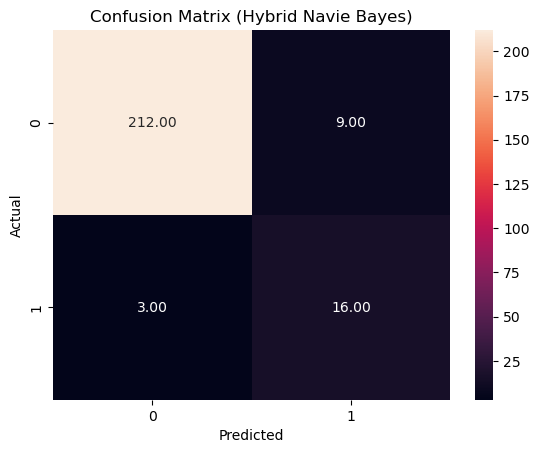

In [66]:
conf = confusion_matrix(y_test, hybrid_predictions)
print(conf)

sns.heatmap(conf, annot=True,fmt = ".2f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Hybrid Navie Bayes)')
plt.show()

In [67]:
report = classification_report(y_test, hybrid_predictions, digits=4)
print('Classification Report (Hybrid Navie Bayes)')
print(report)

Classification Report (Hybrid Navie Bayes)
              precision    recall  f1-score   support

           0     0.9860    0.9593    0.9725       221
           1     0.6400    0.8421    0.7273        19

    accuracy                         0.9500       240
   macro avg     0.8130    0.9007    0.8499       240
weighted avg     0.9587    0.9500    0.9531       240



Legendary  Generation
False      1             160
           2             101
           3             142
           4             108
           5             150
           6              74
True       1               6
           2               5
           3              18
           4              13
           5              15
           6               8
dtype: int64
Generation         1        2       3         4         5         6
Legendary   0.036145  0.04717  0.1125  0.107438  0.090909  0.097561


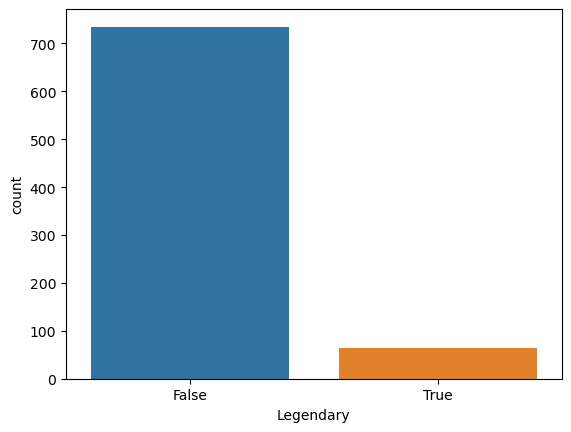

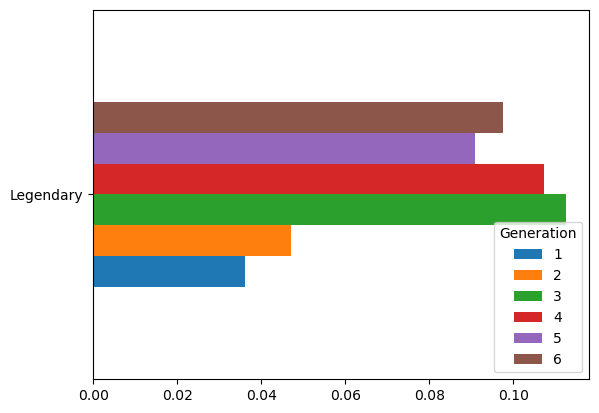

Max Value: 190
Min Value: 5
           Legendary                                
attack_cat   5 to 50 51 to 100 101 to 150 191 to 190
gen_cat                                             
1 to 3      0.009259  0.062241     0.1250   0.363636
4 to 6      0.000000  0.050228     0.2625   0.571429


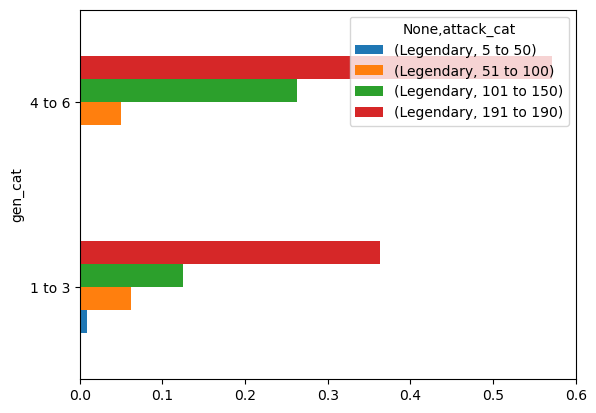

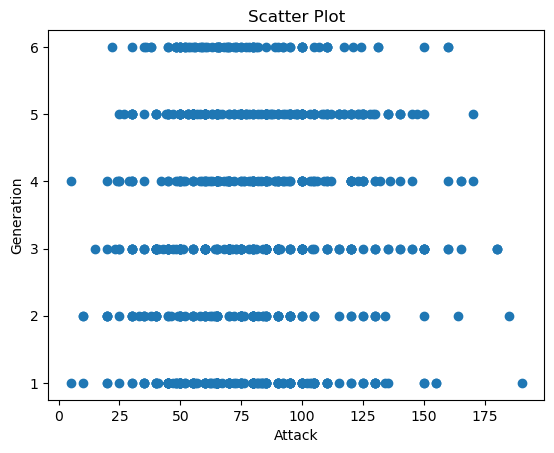

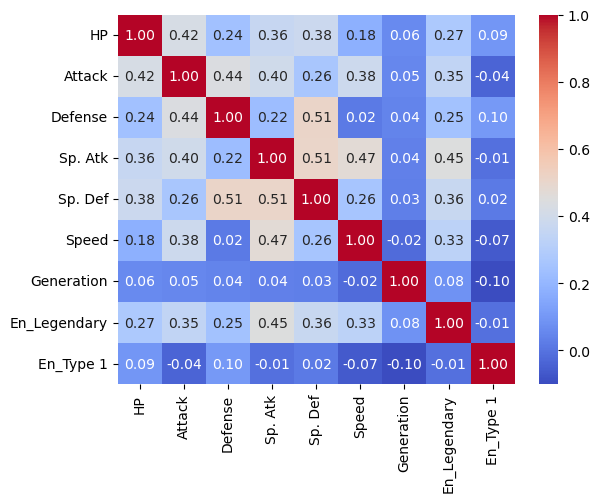

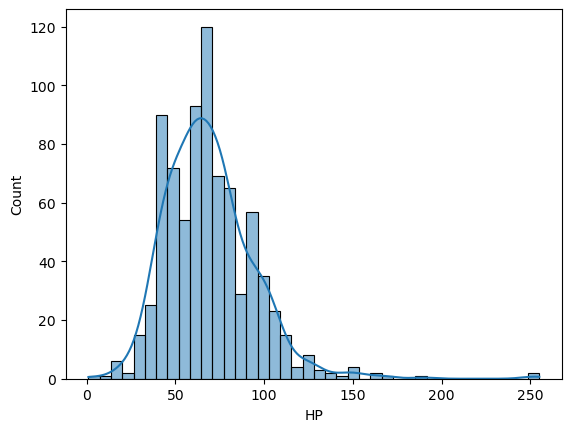

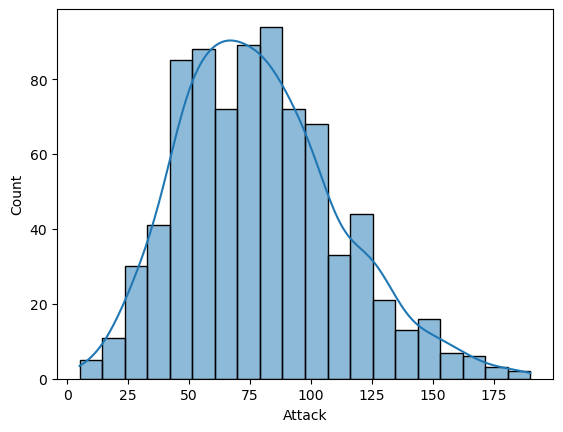

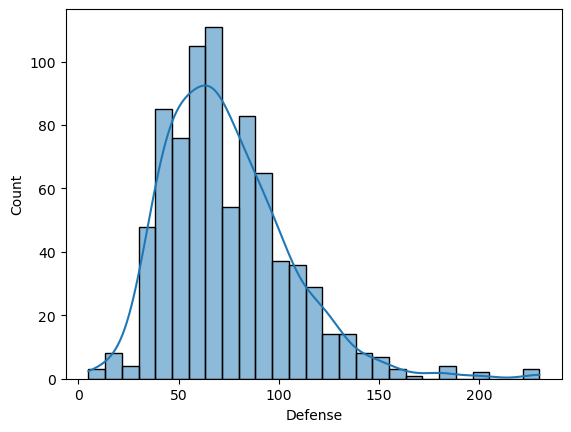

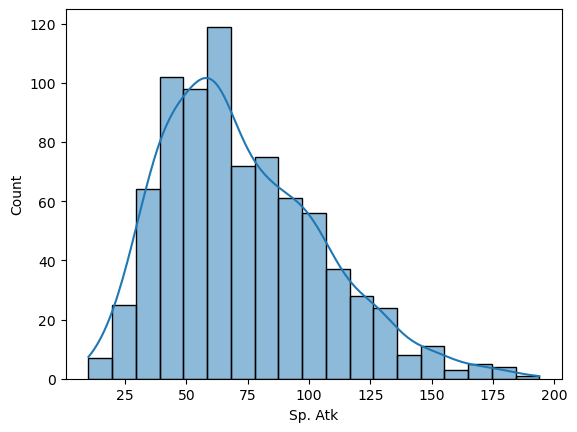

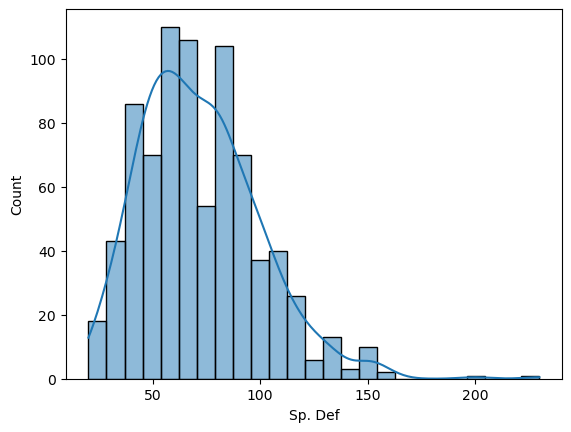

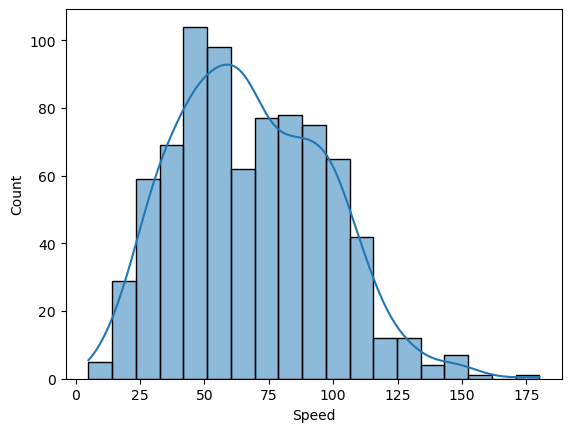

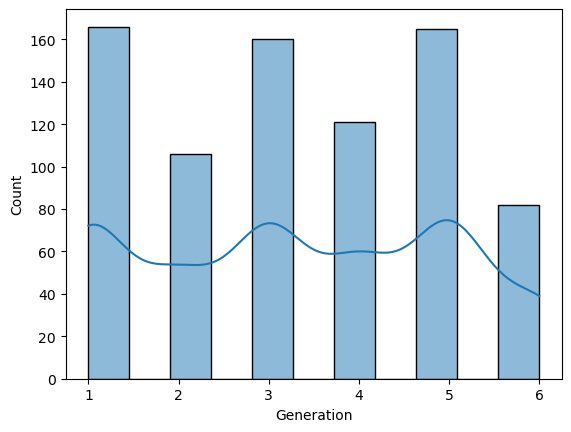

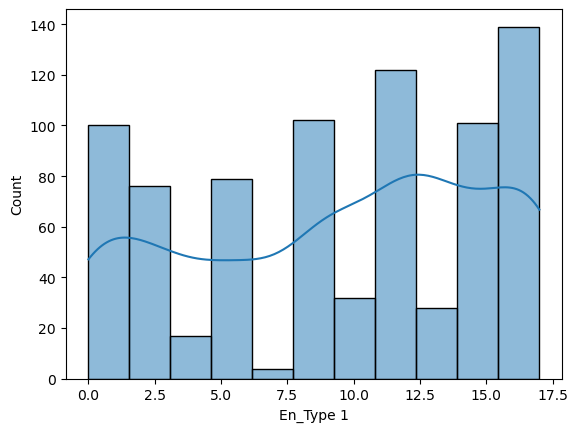

               HP      Attack     Defense     Sp. Atk     Sp. Def       Speed  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean    69.258750   79.001250   73.842500   72.820000   71.902500   68.277500   
std     25.534669   32.457366   31.183501   32.722294   27.828916   29.060474   
min      1.000000    5.000000    5.000000   10.000000   20.000000    5.000000   
25%     50.000000   55.000000   50.000000   49.750000   50.000000   45.000000   
50%     65.000000   75.000000   70.000000   65.000000   70.000000   65.000000   
75%     80.000000  100.000000   90.000000   95.000000   90.000000   90.000000   
max    255.000000  190.000000  230.000000  194.000000  230.000000  180.000000   

       Generation   En_Type 1  
count   800.00000  800.000000  
mean      3.32375    9.467500  
std       1.66129    5.580356  
min       1.00000    0.000000  
25%       2.00000    5.000000  
50%       3.00000   10.000000  
75%       5.00000   14.000000  
max       6.00

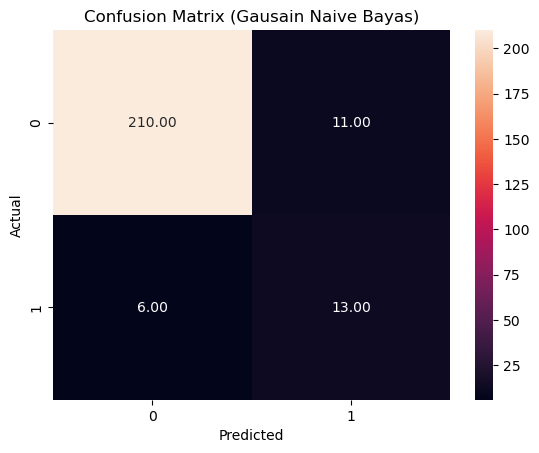

Classification Report (Gausain Naive Bayas)
              precision    recall  f1-score   support

           0     0.9722    0.9502    0.9611       221
           1     0.5417    0.6842    0.6047        19

    accuracy                         0.9292       240
   macro avg     0.7569    0.8172    0.7829       240
weighted avg     0.9381    0.9292    0.9329       240

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64
     Generation  En_Type 1  HP_bins  Attack_bins  Defense_bins  Sp. Atk_bins  \
696           5          1      3.0          5.0           3.0           6.0   
667           5         14      2.0          3.0           3.0           6.0   
63            1          6      2.0          3.0           1.0           3.0   
533           4          3      1.0          3.0           4.0           5.0   
66            1         17      2.0          3.0           2.0           2.0   
..          ...        ...      ...          ...           ...  

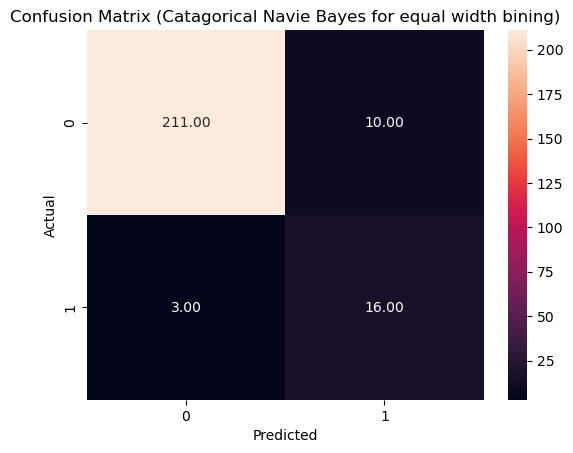

Naive Bayes score:  0.9458333333333333
Classification Report (Catagorical Navie Bayes for equal width bining)
              precision    recall  f1-score   support

           0     0.9860    0.9548    0.9701       221
           1     0.6154    0.8421    0.7111        19

    accuracy                         0.9458       240
   macro avg     0.8007    0.8984    0.8406       240
weighted avg     0.9566    0.9458    0.9496       240

     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  En_Type 1
696   8       7        7        9        7      8           5          1
667   6       4        5        9        7      1           5         14
63    2       4        1        5        2      4           1          6
533   1       3        8        8        8      7           4          3
66    4       3        4        2        2      7           1         17
..   ..     ...      ...      ...      ...    ...         ...        ...
71    2       1        4        9        7      9   

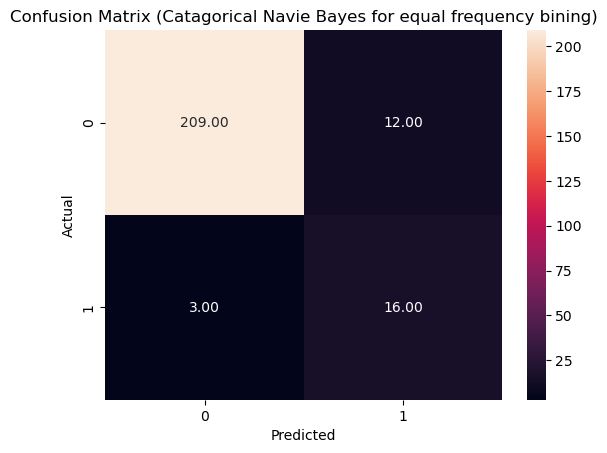

Classification Report (Catagorical Navie Bayes for equal frequency bining)
              precision    recall  f1-score   support

           0     0.9858    0.9457    0.9654       221
           1     0.5714    0.8421    0.6809        19

    accuracy                         0.9375       240
   macro avg     0.7786    0.8939    0.8231       240
weighted avg     0.9530    0.9375    0.9428       240

Hybrid Naive Bayes Accuracy: 0.9500
[[212   9]
 [  3  16]]


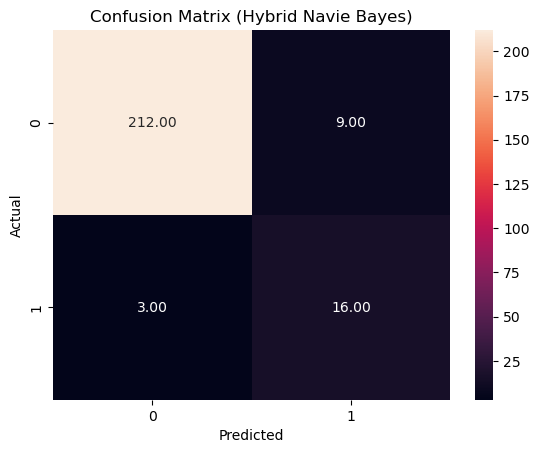

Classification Report (Hybrid Navie Bayes)
              precision    recall  f1-score   support

           0     0.9860    0.9593    0.9725       221
           1     0.6400    0.8421    0.7273        19

    accuracy                         0.9500       240
   macro avg     0.8130    0.9007    0.8499       240
weighted avg     0.9587    0.9500    0.9531       240

